In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import pandas as pd

# Change the current working directory to the directory containing the file
os.chdir(r'C:\Users\JASHNAVI\Downloads')

# Specify the filename
file_name = 'WineQT.csv'

# Load the CSV file into a DataFrame using pandas
dataset = pd.read_csv(file_name)

In [3]:
dataset.columns = [c.lower().replace(' ','_') for c in dataset.columns]
dataset['quality'] = dataset['quality'].apply(lambda x: x-3)
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,4


In [4]:
#Descriptive Statistics
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,2.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,2.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,3.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,3.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000,1597.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#Missing Values
dataset.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

In [7]:
#Duplicated Values
print("\nNumber of duplicated rows : ", dataset.drop(columns=['id']).duplicated().sum(),"\n")


Number of duplicated rows :  125 



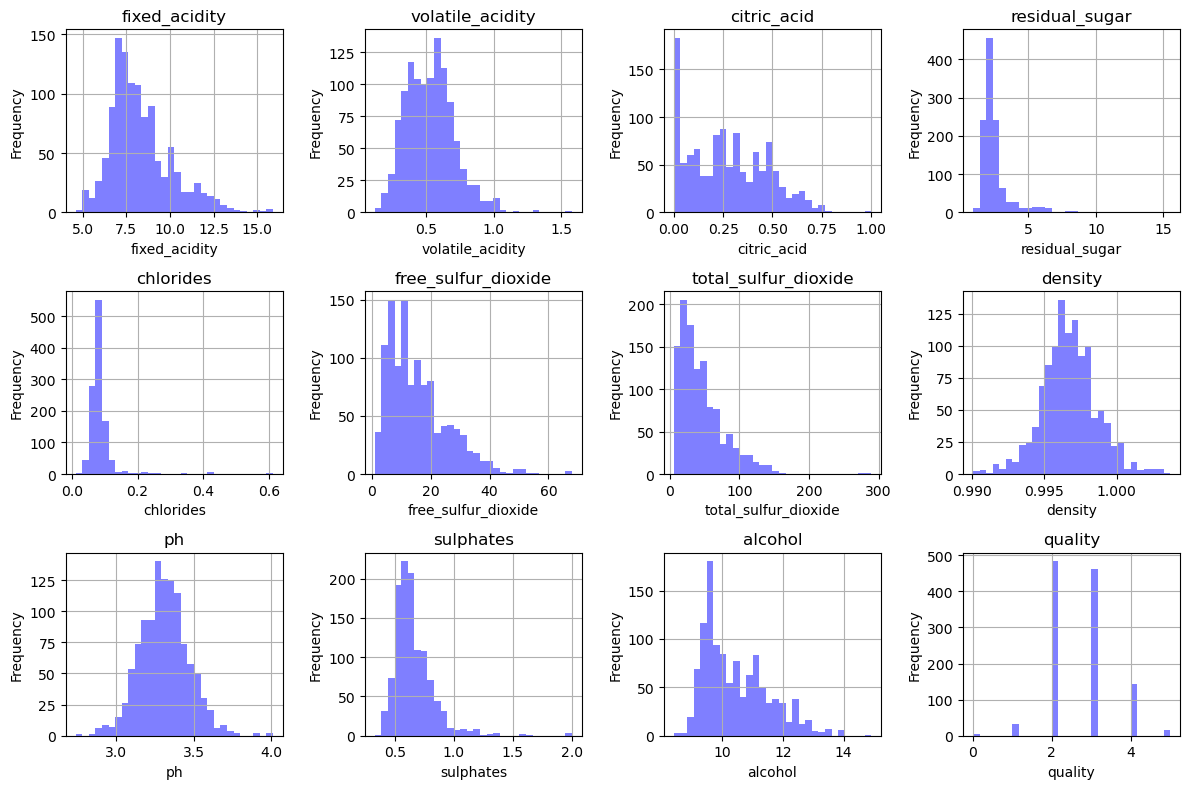

In [8]:
import matplotlib.pyplot as plt

def plot_duplicated(dataset):
    columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
               'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
               'ph', 'sulphates', 'alcohol', 'quality']
    plt.figure(figsize=(12, 8))
    for column_to_analyze in columns:
        plt.subplot(3, 4, columns.index(column_to_analyze) + 1)  # create subplots in a 3x4 grid
        dataset[column_to_analyze].hist(bins=30, color='blue', alpha=0.5)
        plt.title(column_to_analyze)
        plt.xlabel(column_to_analyze)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Call the function with your dataset
plot_duplicated(dataset)


In [9]:
# Stats with dropping duplicated rows

dataset.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'], keep='first').describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,2.641454,801.762279
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744,466.314822
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,2.000000,404.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,3.000000,791.500000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,3.000000,1203.750000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,5.000000,1597.000000


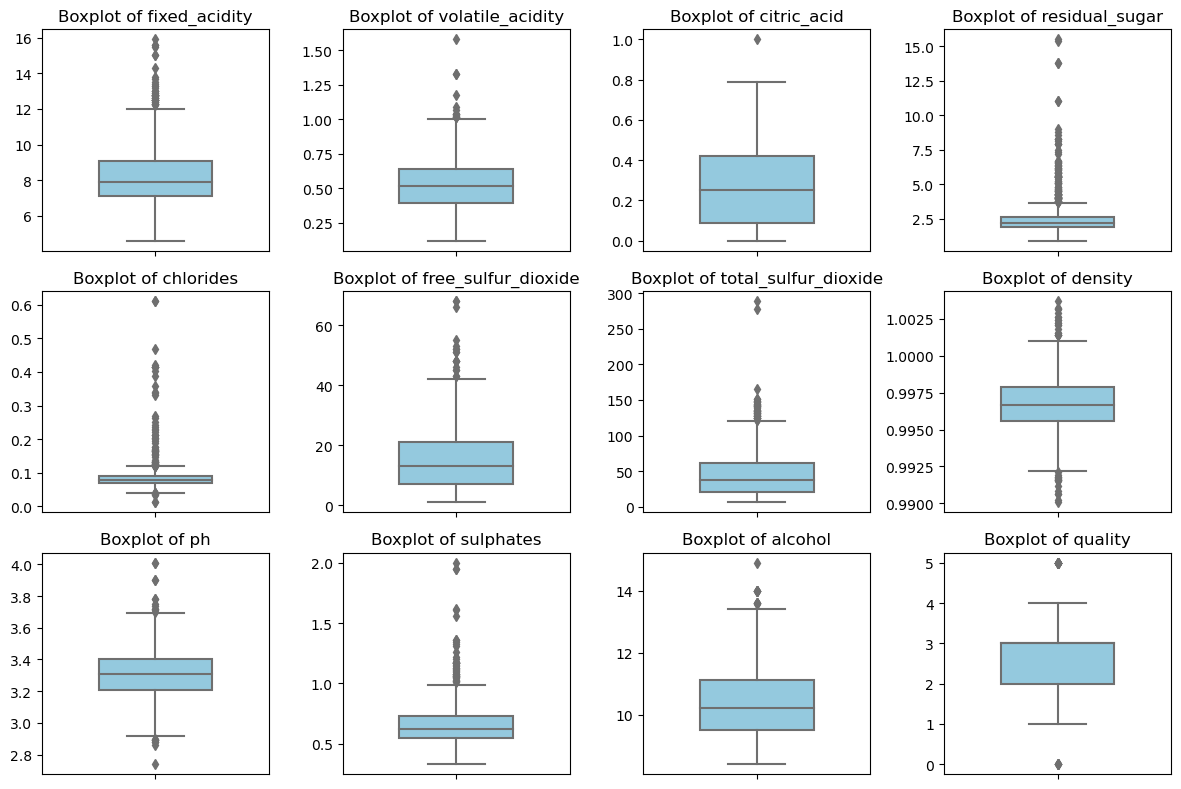

In [10]:
#outliers
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
           'ph', 'sulphates', 'alcohol', 'quality']


plt.figure(figsize=(12, 8))

for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.boxplot(data=dataset, y=feature, color='skyblue', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')

plt.tight_layout()
plt.show()



Outliers in CHLORIDES




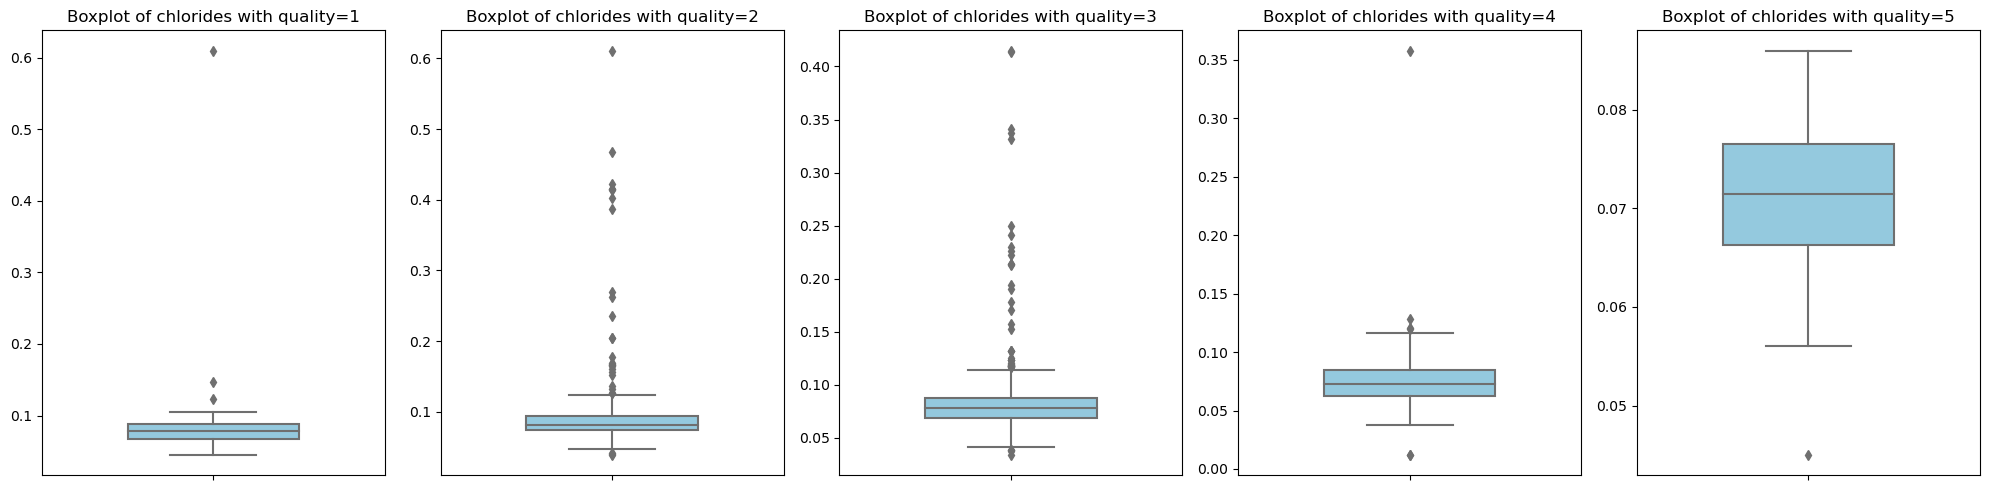

In [11]:
print("\n\nOutliers in CHLORIDES\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=dataset[dataset['quality']==i], y='chlorides', color='skyblue', width=0.5)
    plt.title(f'Boxplot of chlorides with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()



Outliers in RESIDUAL SUGAR




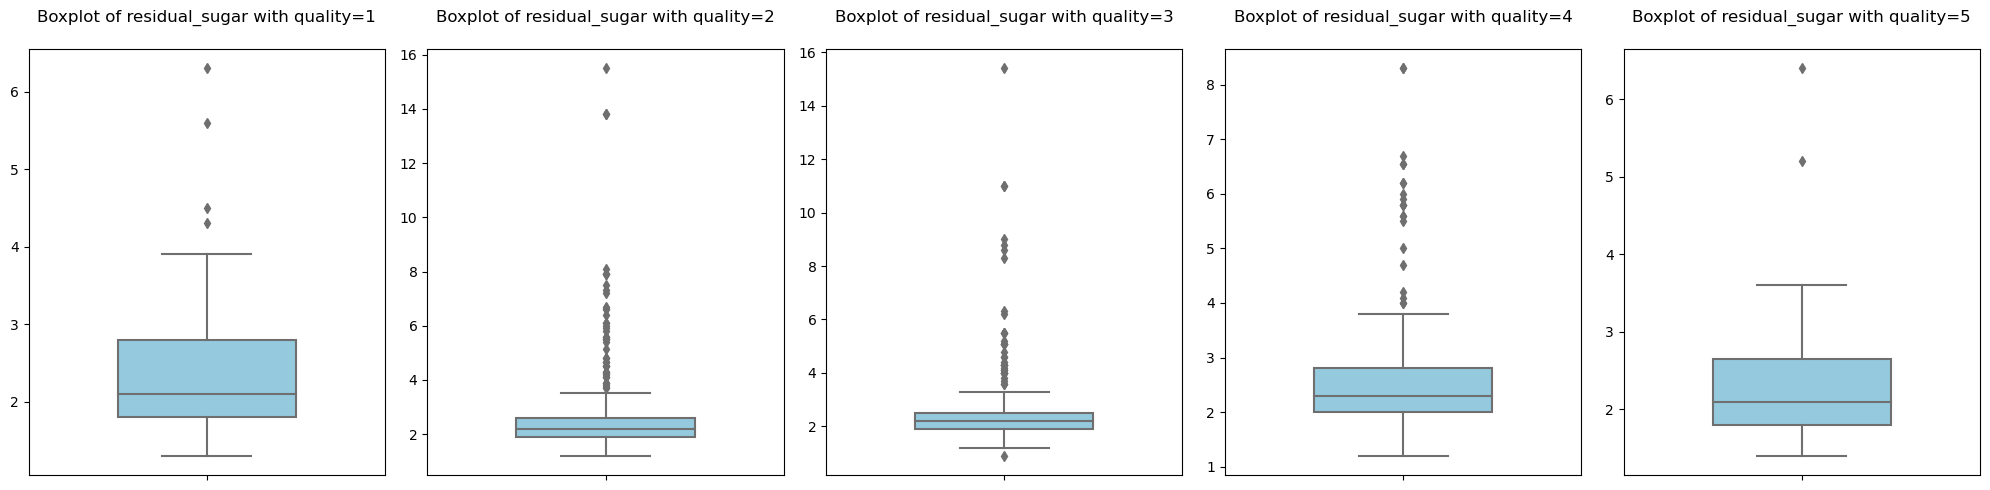

In [12]:
print("\n\nOutliers in RESIDUAL SUGAR\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=dataset[dataset['quality']==i], y='residual_sugar', color='skyblue', width=0.5)
    plt.title(f'Boxplot of residual_sugar with quality={i}\n')
    plt.ylabel('')
plt.tight_layout()
plt.show()



Outliers in SULPHATES




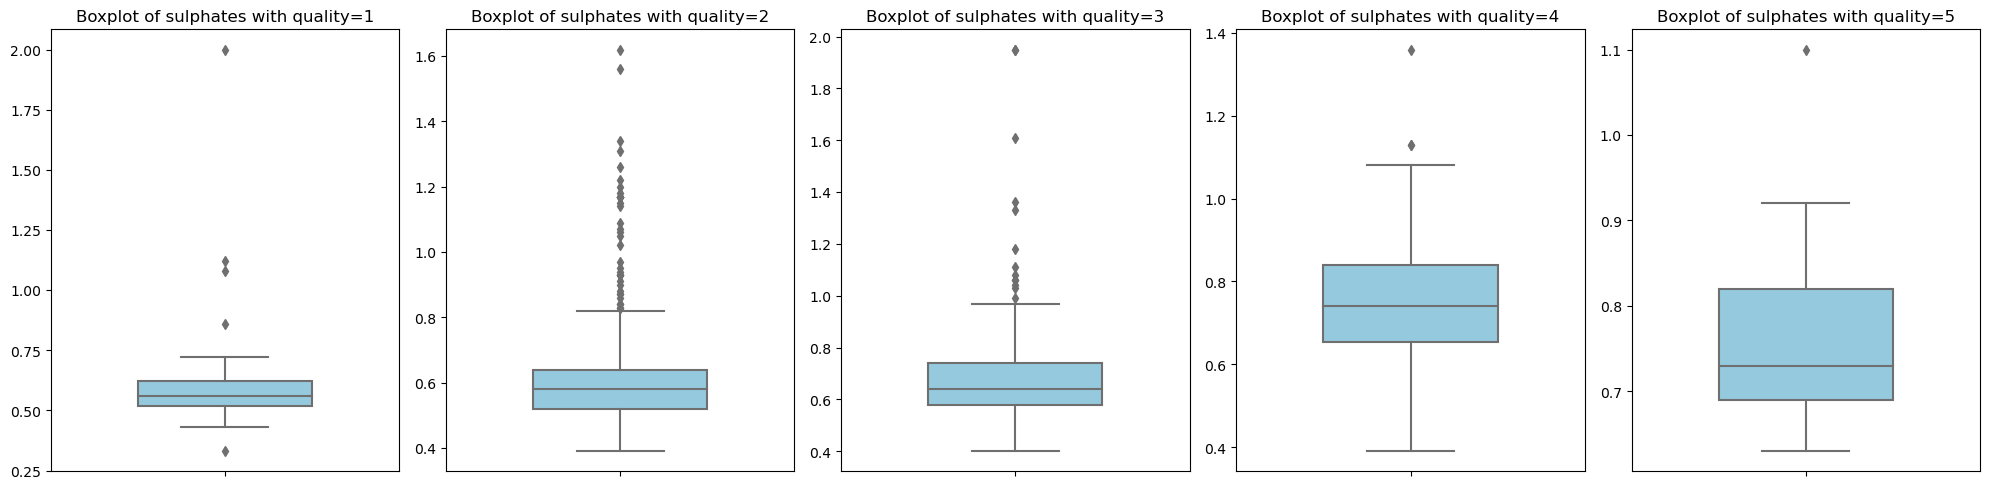

In [13]:
print("\n\nOutliers in SULPHATES\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=dataset[dataset['quality']==i], y='sulphates', color='skyblue', width=0.5)
    plt.title(f'Boxplot of sulphates with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()



Outliers in ALCOHOL




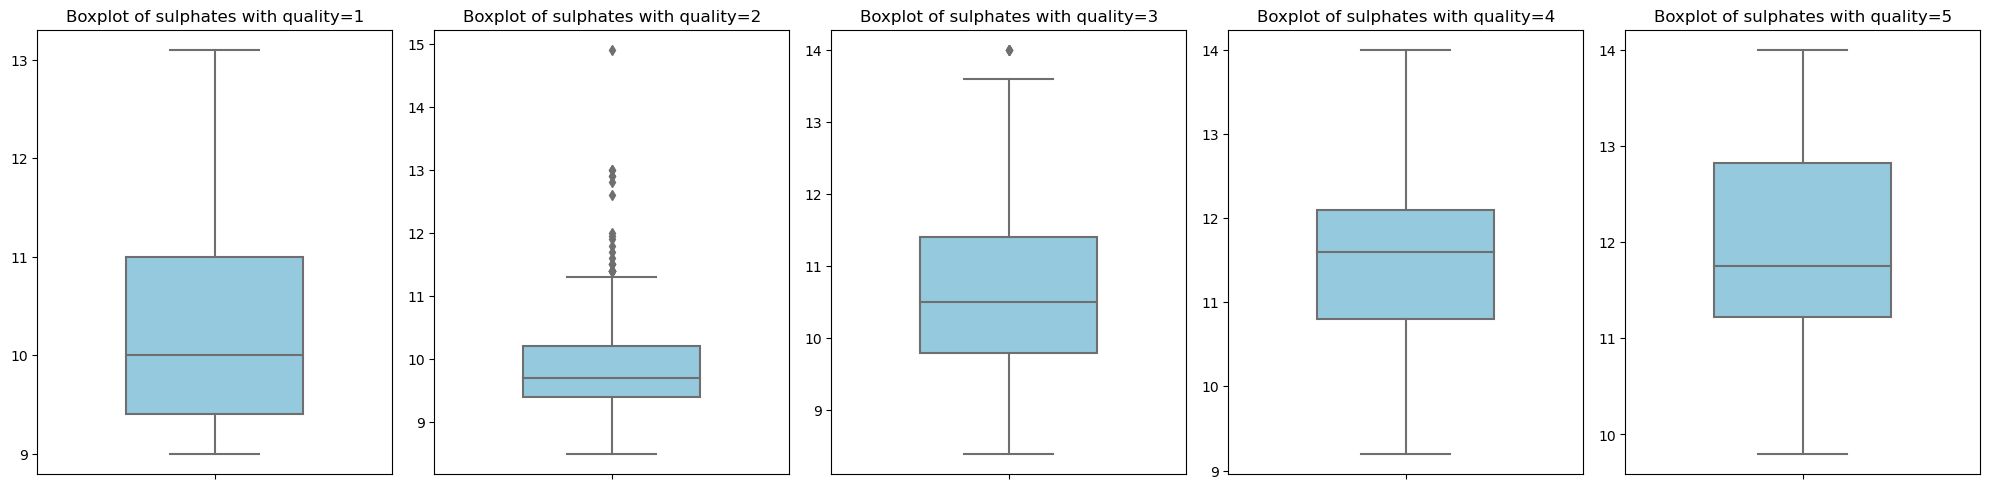

In [14]:
print("\n\nOutliers in ALCOHOL\n\n")
plt.figure(figsize=(20, 5))
for i in range(1,6):
    plt.subplot(1, 5, i)
    sns.boxplot(data=dataset[dataset['quality']==i], y='alcohol', color='skyblue', width=0.5)
    plt.title(f'Boxplot of sulphates with quality={i}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [15]:
percent_to_drop = 100 - 100*len(dataset[(dataset['residual_sugar']<=7) & (dataset['chlorides']<=0.4)])/len(dataset)

print(f"\nDropping selected outliers will result in loss of {percent_to_drop:.2f} % of data")


Dropping selected outliers will result in loss of 2.54 % of data


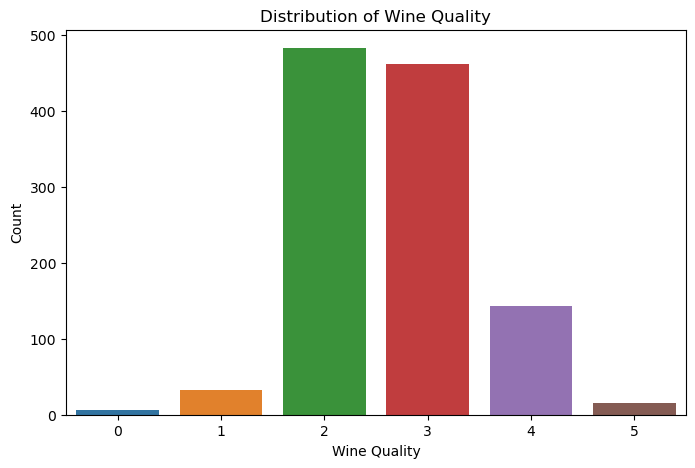

In [16]:
#Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='quality')#, palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

In [17]:
#Feature Distributions
import math
def distplots_by_target(dataset, target, features):
    plt.figure(figsize=(12, 8))
    for feature in features:
        plt.subplot(math.floor(math.sqrt(len(features))), # hight of the grid
                    math.ceil(math.sqrt(len(features))), # length of the grid
                    features.index(feature) + 1)
        # add plot for each quality
        for q in sorted(dataset[target].unique()):

            sns.kdeplot(data=dataset[dataset[target]==q], x=feature, fill=True, label=q)
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')  
    plt.legend(title=str(target), loc='center right', bbox_to_anchor=(1.4, 0.5))

    plt.tight_layout()
    plt.show()

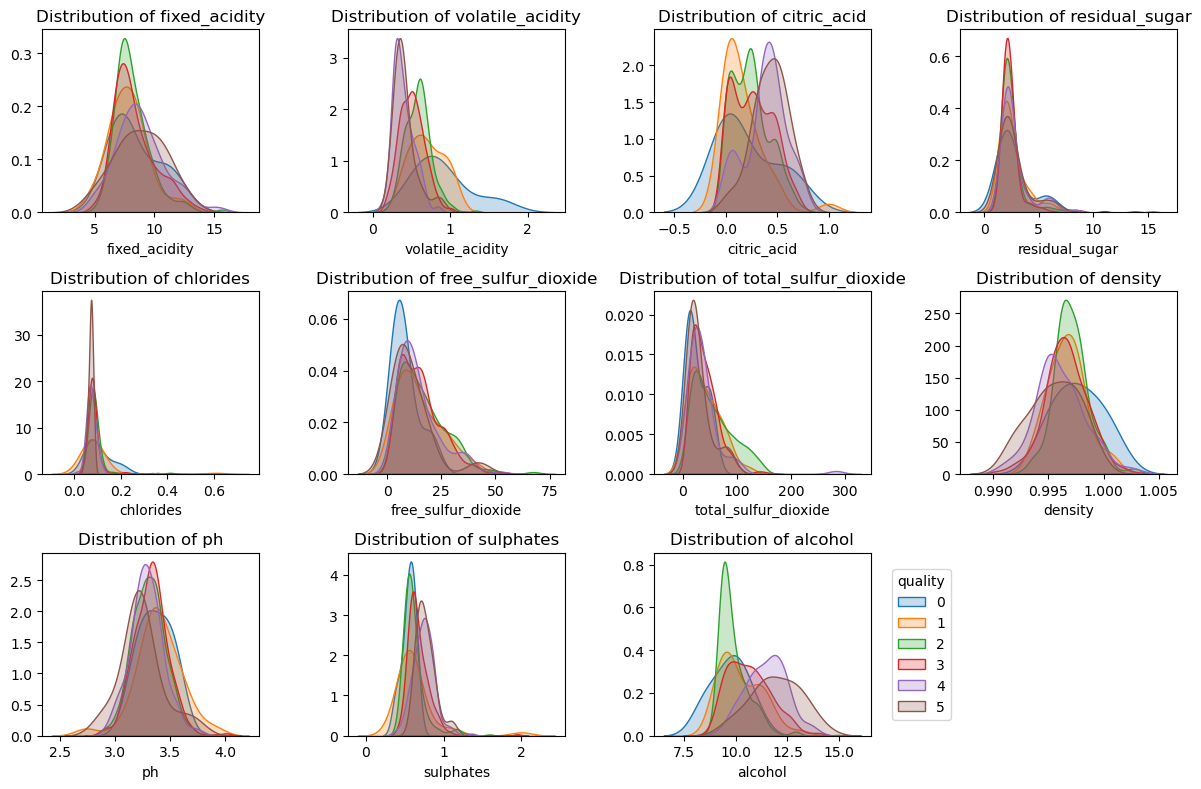

In [18]:
features = [ 'fixed_acidity', 'volatile_acidity', 'citric_acid',
             'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
             'total_sulfur_dioxide','density','ph','sulphates','alcohol' ]
distplots_by_target(dataset, 'quality', features)

In [19]:
#checking data for balance
def check_balance(dataset, target_column):
    class_frequencies = dataset[target_column].value_counts().to_dict()
    num_classes = len(class_frequencies)
    min_frequency = min(class_frequencies.values())
    max_frequency = max(class_frequencies.values())
    
    # Calculate the balance ratio
    balance_ratio = min_frequency / max_frequency
    
    # Determine if the dataset is balanced
    is_balanced = balance_ratio >= 0.9  

    balance_report = {
        "class_frequencies": class_frequencies,
        "num_classes": num_classes,
        "min_frequency": min_frequency,
        "max_frequency": max_frequency,
        "balance_ratio": balance_ratio,
        "is_balanced": is_balanced}
    return balance_report

target_column = 'quality'
balance_report = check_balance(dataset, target_column)

print("Class Frequencies:")
for class_label, frequency in balance_report["class_frequencies"].items():
    print(f"Class '{class_label}': {frequency} samples")

print(f"Number of Classes: {balance_report['num_classes']}")
print(f"Minimum Class Frequency: {balance_report['min_frequency']}")
print(f"Maximum Class Frequency: {balance_report['max_frequency']}")
print(f"Balance Ratio: {balance_report['balance_ratio']:.2f}")
print(f"Is Balanced: {balance_report['is_balanced']}")

Class Frequencies:
Class '2': 483 samples
Class '3': 462 samples
Class '4': 143 samples
Class '1': 33 samples
Class '5': 16 samples
Class '0': 6 samples
Number of Classes: 6
Minimum Class Frequency: 6
Maximum Class Frequency: 483
Balance Ratio: 0.01
Is Balanced: False


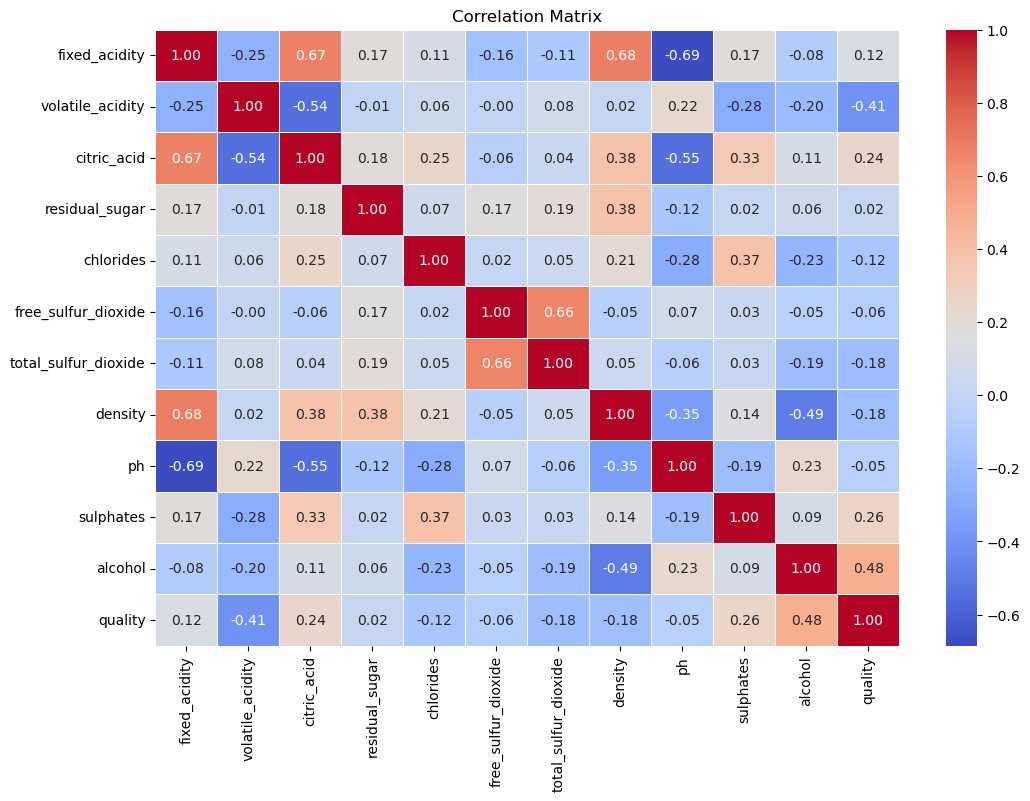

In [20]:
#Correlations
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'ph', 'sulphates', 'alcohol', 'quality']

correlation_data = dataset[features]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [21]:
#EDA Conclusion:
'''
1. No missing values

2. About 10% of rows were duplicated and has been removed

3. Outliers are present but seem to contain valuable information
    Most outliers are in
       1. residual_sugar
       2. chlorides
       3. sulphates
We have removed a little bit of them that don't affect the quality with small number of data points:
* removed data points where df['residual_sugar'] > 7
* removed data points where df['chlorides'] > 0.4

4. Best Quality Wine (4 and 5, we've shifted quality to be from 0 to 5)
    Has highest
       1. alcohol
       2. citric_acid
       3. sulphates
    Has lowest
       1. volatile_acidity
       2. density
       3. pH
5. Dataset is unbalanced
'''

"\n1. No missing values\n\n2. About 10% of rows were duplicated and has been removed\n\n3. Outliers are present but seem to contain valuable information\n    Most outliers are in\n       1. residual_sugar\n       2. chlorides\n       3. sulphates\nWe have removed a little bit of them that don't affect the quality with small number of data points:\n* removed data points where df['residual_sugar'] > 7\n* removed data points where df['chlorides'] > 0.4\n\n4. Best Quality Wine (4 and 5, we've shifted quality to be from 0 to 5)\n    Has highest\n       1. alcohol\n       2. citric_acid\n       3. sulphates\n    Has lowest\n       1. volatile_acidity\n       2. density\n       3. pH\n5. Dataset is unbalanced\n"